<a href="https://colab.research.google.com/github/bhgtankita/MYWORK/blob/master/Grad_CAM_RESNET18_Transfer_Learning_on_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Dependencies

In [2]:
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, GlobalAveragePooling2D
from classification_models.resnet import ResNet18, preprocess_input
import keras.backend as K
import shutil, os
from google.colab.patches import cv2_imshow
import cv2

Using TensorFlow backend.


# Download ResNet18 Pretrained on IMAGENET Dataset

In [1]:
!pip install git+https://github.com/qubvel/classification_models.git

  Cloning https://github.com/qubvel/classification_models.git to /tmp/pip-req-build-jeh7wgob
  Running command git clone -q https://github.com/qubvel/classification_models.git /tmp/pip-req-build-jeh7wgob
  Running command git submodule update --init --recursive -q
  Stored in directory: /tmp/pip-ephem-wheel-cache-i5qdf8uw/wheels/de/2b/fd/29a6d33edb8c28bc7d94e95ea1d39c9a218ac500a3cfb1b197
Successfully built image-classifiers


# Preparing data

In [0]:
# prepare your data
(X_train, y_train), (X_test, y_test) = cifar10.load_data() 
X_train.shape, X_test.shape, np.unique(y_train).shape[0]
# one-hot encoding
n_classes = 10
y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)

# Visualisation of CIFAR-10 images

Shape of each image in the training data:  (32, 32, 3)


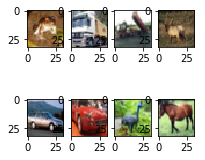

In [5]:
fig = plt.figure(figsize=(3, 3))

for i in range(1, 9):
    img = X_train[i-1]
    fig.add_subplot(2, 4, i)
    plt.imshow(img)

print("Shape of each image in the training data: ", X_train.shape[1:])

# Transfer learning on ResNet18 and training for 10 epochs on Cifar-10

In [6]:
n_classes = 10

# build model
base_model = ResNet18(input_shape=(32,32,3), weights='imagenet', include_top=False)
# for layer in base_model.layers:
#     layer.trainable = False
x = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(n_classes, activation='softmax')(x)
model = keras.models.Model(inputs=[base_model.input], outputs=[output])
model.summary()

# training
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, nb_epoch=10, batch_size=64, verbose=1)

W0701 23:12:35.952256 140624137115520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0701 23:12:35.995893 140624137115520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:245: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0701 23:12:35.997557 140624137115520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0701 23:12:35.998864 140624137115520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0701 23:12:36.000389 140624

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, 32, 32, 3)    9           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 38, 38, 3)    0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, 16, 16, 64)   9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
bn0 (Batch

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  
W0701 23:12:39.989146 140624137115520 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
50000/50000 [==============================] - 59s 1ms/step - loss: 1.0557 - acc: 0.6369
Epoch 2/10
50000/50000 [==============================] - 55s 1ms/step - loss: 0.6615 - acc: 0.7700
Epoch 3/10
50000/50000 [==============================] - 55s 1ms/step - loss: 0.5157 - acc: 0.8198
Epoch 4/10
50000/50000 [==============================] - 55s 1ms/step - loss: 0.4082 - acc: 0.8570
Epoch 5/10
50000/50000 [==============================] - 55s 1ms/step - loss: 0.3204 - acc: 0.8880
Epoch 6/10
50000/50000 [==============================] - 55s 1ms/step - loss: 0.2465 - acc: 0.9135
Epoch 7/10
50000/50000 [==============================] - 55s 1ms/step - loss: 0.1828 - acc: 0.9373
Epoch 8/10
50000/50000 [==============================] - 55s 1ms/step - loss: 0.1414 - acc: 0.9518
Epoch 9/10
50000/50000 [==============================] - 55s 1ms/step - loss: 0.1118 - acc: 0.9626
Epoch 10/10
50000/50000 [==============================] - 55s 1ms/step - loss: 0.0839 - acc: 0.9727

# Evaluating Model

In [7]:
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 6s 603us/step


[0.8359985394477845, 0.7944]

# Collecting misclassified images in test dataset

In [0]:
actual = np.argmax(y_test, axis=1)
prediction=[]
accuracy=[]
# TruePred=[]
incorrect_pred = []
correct_pred = []

for idx, val in enumerate(X_test):
  val = np.expand_dims(val, axis=0)
  pred = model.predict(val)
  predicted_value = np.argmax(pred, axis=1)
  prediction.append(predicted_value)
  accuracy.append(np.amax(pred, axis=1)*100)
  if actual[idx] != predicted_value:
      incorrect_pred.append(idx)
  else:
      correct_pred.append(idx)

# Helper Function

In [0]:
def process_image(idx_image):
  x = X_test[idx_image]
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  return x

In [12]:
misclassified = incorrect_pred[:50]
len(misclassified)

50

# Applying Grad-CAM on 50 misclassified images

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


IndexError: ignored

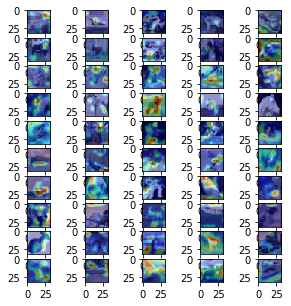

In [14]:
fig1 = plt.figure(figsize=(5, 5))

counter=0
for index, value in enumerate(X_test):
  if index == misclassified[counter] and counter <= 50:
    counter=counter+1
    x = process_image(index)
    preds = model.predict(x)
    class_idx = np.argmax(preds[0])
    class_output = model.output[:, class_idx]
    last_conv_layer = model.get_layer("add_2") # 8x8x64

    grads = K.gradients(class_output, last_conv_layer.output)[0]
    pooled_grads = K.mean(grads, axis=(0, 1, 2))
    iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
    pooled_grads_value, conv_layer_output_value = iterate([x])
    for i in range(64):
        conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

    heatmap = np.mean(conv_layer_output_value, axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)

    img = value
#     img = cv2.resize(img, (100, 100))
#     heatmap = cv2.resize(heatmap, (100, 100))
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
    gradcam = cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB)
#     print(counter)
    fig1.add_subplot(10, 5, counter)
    plt.imshow(gradcam)